# Deep Learning

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

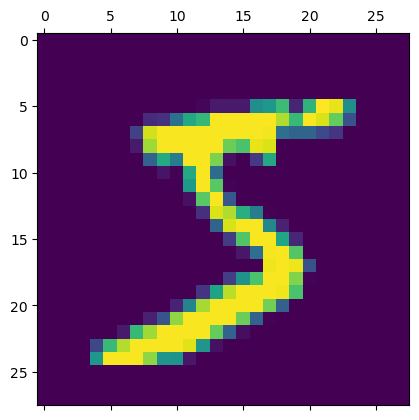

In [8]:
plt.matshow(X_train[0])

##### Ground truth of X_test will be present in y_train in corresponding indexes.

In [9]:
import random
[random.randint(0,9) for _ in range(10)]

[3, 3, 2, 5, 1, 2, 8, 2, 3, 9]

In [10]:
indexes=[7,2,5,7,9,0,9,9,6,1]

This image is of the number 3 at index 7


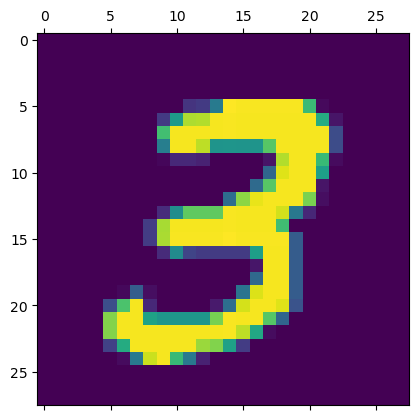

This image is of the number 4 at index 2


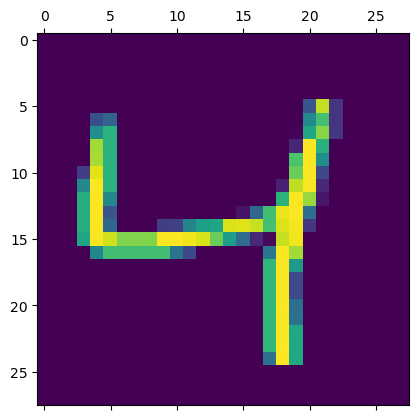

This image is of the number 2 at index 5


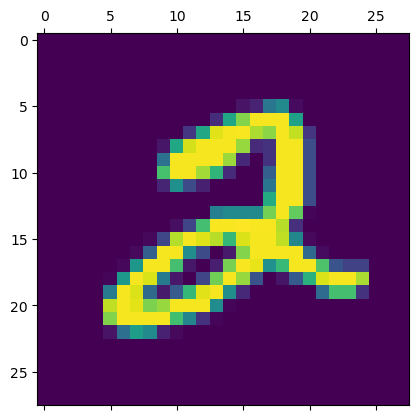

This image is of the number 3 at index 7


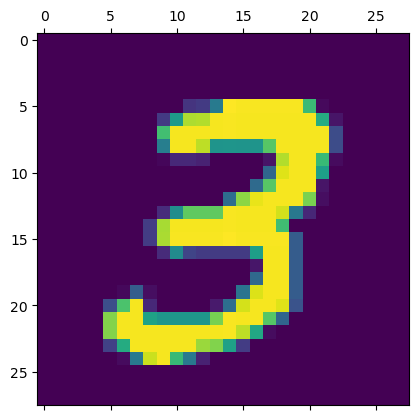

This image is of the number 4 at index 9


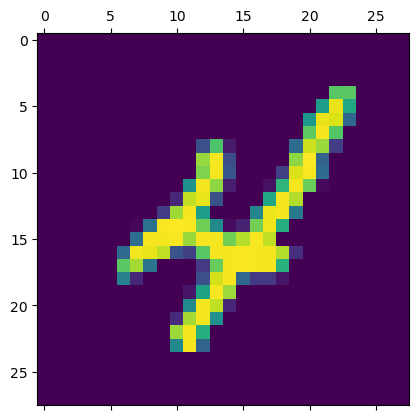

This image is of the number 5 at index 0


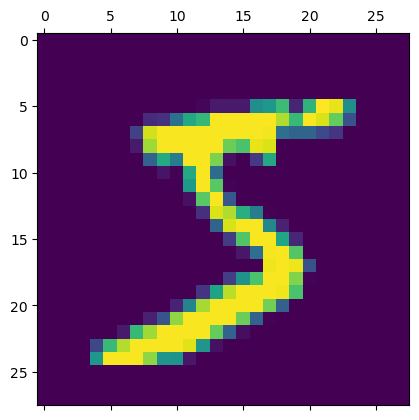

This image is of the number 4 at index 9


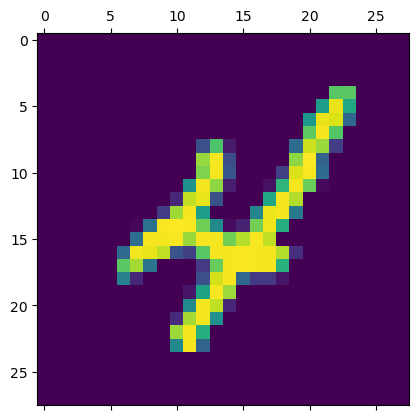

This image is of the number 4 at index 9


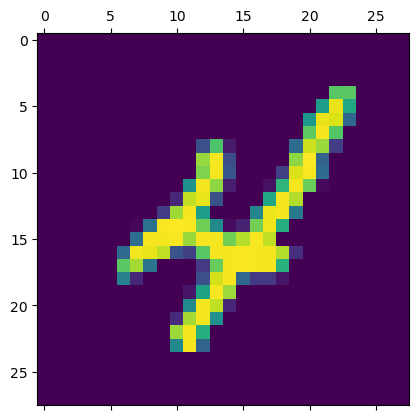

This image is of the number 1 at index 6


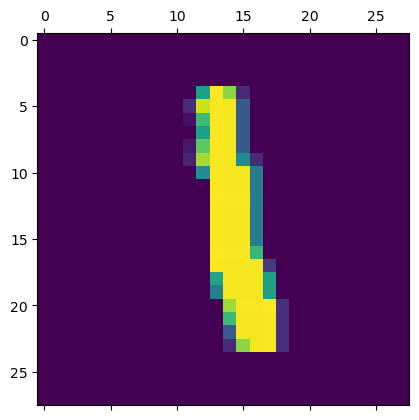

This image is of the number 0 at index 1


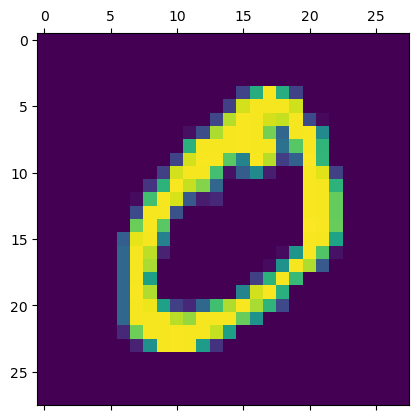

In [11]:
for index in indexes:
    print(f"This image is of the number {y_train[index]} at index {index}")
    plt.matshow(X_train[index])
    plt.show()

In [12]:
y_train[0]

5

#### Data preprocessing
our values belong from 0-255: normalize this values between 0-1

In [13]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [16]:
X_train_flattened.shape

(60000, 784)

#### 2D array with 28 rows,each row with 28 numbers when flattened will be changed into 1D array with 74 items for each number.

In [17]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### Sequential: Sequence of Layers

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9255


##### epochs means number of times training has to be done. If it very high, it will result in overfitting and validation accuracy is going to be very low.

In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9255


[0.26944199204444885, 0.9254999756813049]

##### Find which epoch is giving max accuracy.

In [20]:
for epoch in range(5,10):
    model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
    ])

    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

    model.fit(X_train_flattened, y_train, epochs=5)
    score = model.evaluate(X_test_flattened, y_test)
    print(f"For epoch = {epoch} score is {score}")

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4689 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9232
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2640 - accuracy: 0.9262
For epoch = 5 score is [0.26402154564857483, 0.9261999726295471]
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4679 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9233
Epoch 5/5
313/313 [=========

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.7712844e-02, 4.2177598e-07, 5.9066799e-02, 9.7184753e-01,
       2.8134957e-03, 1.0890046e-01, 1.6704453e-06, 9.9981451e-01,
       1.1163816e-01, 5.9967721e-01], dtype=float32)

In [22]:
y_predicted.shape

(10000, 10)

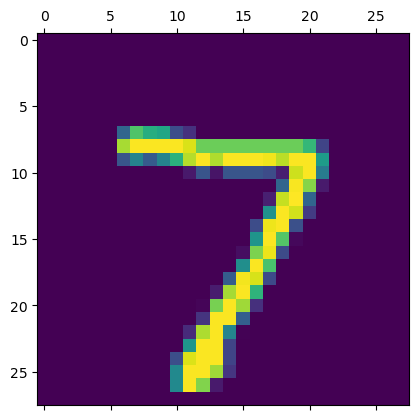

In [23]:
plt.matshow(X_test[0])

###### np.argmax finds a maximum element from an array and returns the index of it.

In [24]:
np.argmax(y_predicted[0])

7

In [25]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [26]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

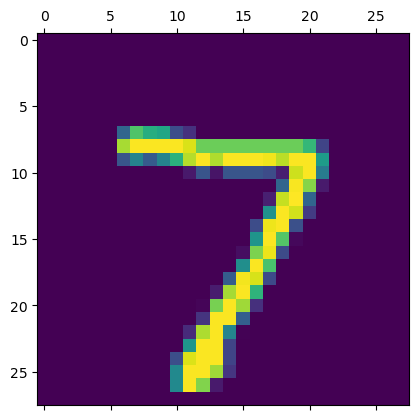

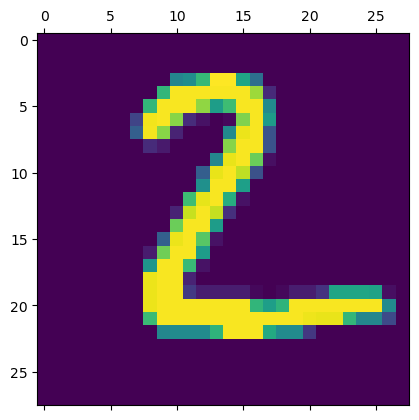

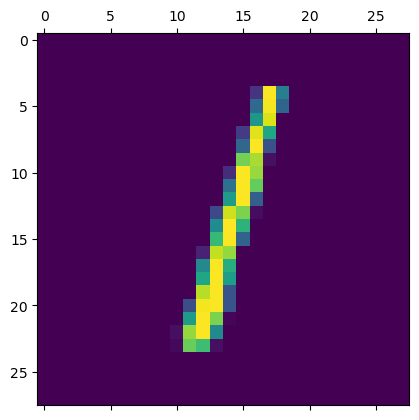

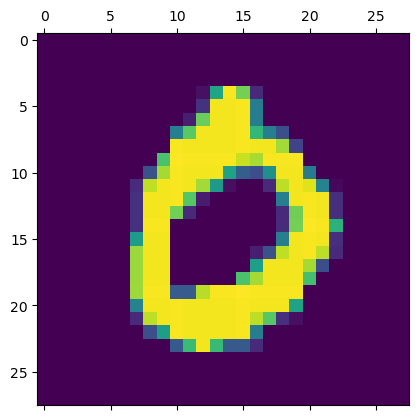

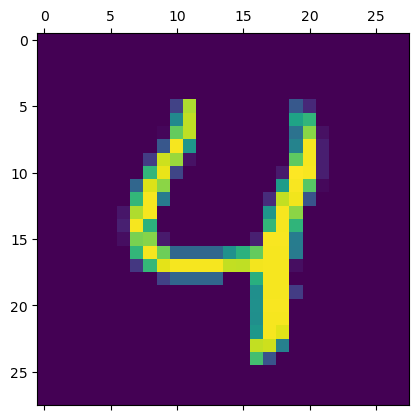

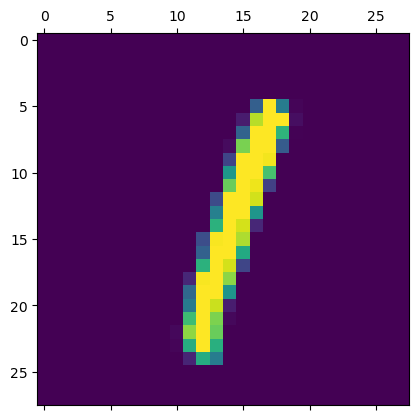

In [27]:
for i, image in enumerate(X_test):
    plt.matshow(image)
    plt.show()
    if i == 5:
        break
    

In [28]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    4,    7,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    8,  932,   14,    9,    3,   12,   10,   36,    3],
       [   2,    0,   20,  933,    0,   15,    2,   10,   21,    7],
       [   1,    1,    5,    2,  927,    0,   11,    3,   11,   21],
       [   9,    2,    2,   41,   11,  769,   16,    6,   31,    5],
       [  11,    3,    7,    1,    7,   10,  914,    2,    3,    0],
       [   1,    5,   21,    8,    9,    0,    0,  957,    3,   24],
       [   5,    7,    7,   25,    9,   25,    9,   12,  870,    5],
       [  11,    7,    1,   13,   46,    6,    0,   28,    8,  889]])>

Text(95.72222222222221, 0.5, 'Truth')

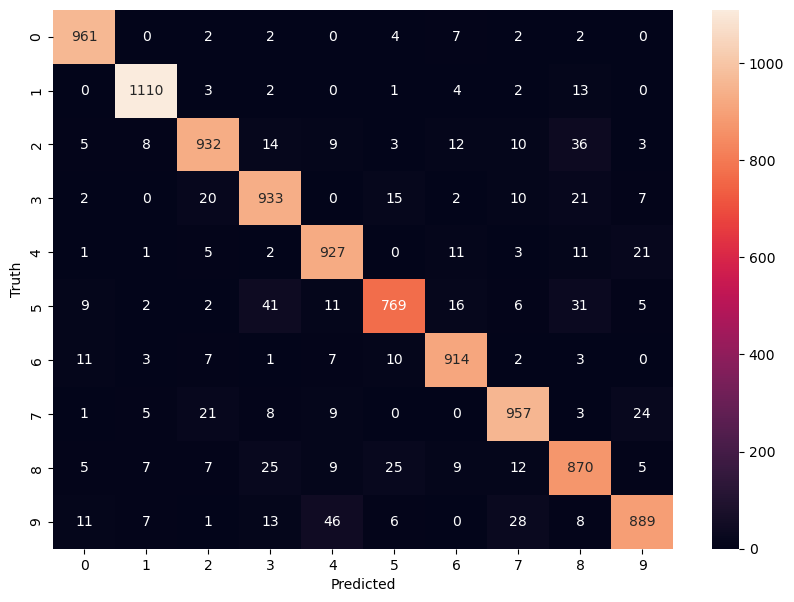

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Using hidden layer

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2623 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9844


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9766


[0.07908627390861511, 0.9765999913215637]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

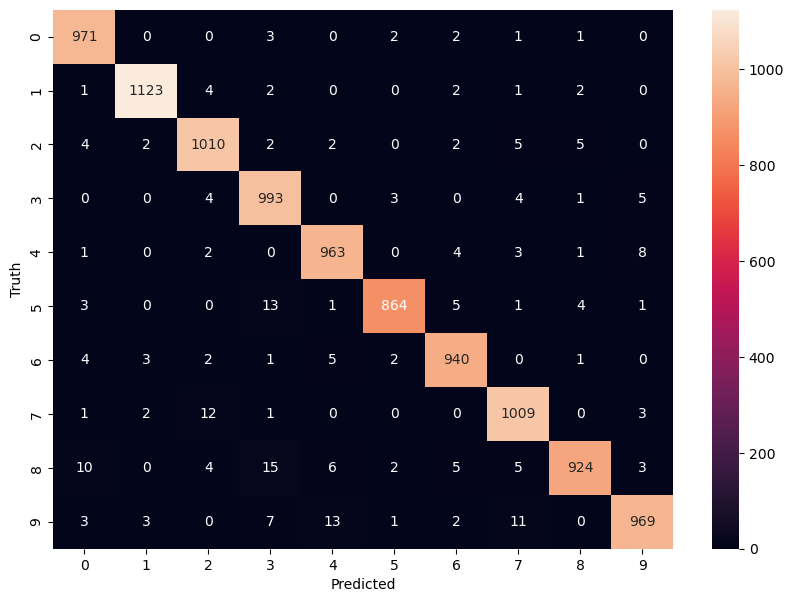

In [32]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')